In [1]:
# Random Forest Classifier

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



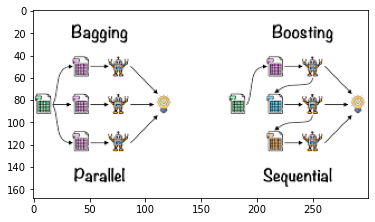

In [2]:
# importing matplotlib modules
import matplotlib.image as mpimg
# Read Images
img = mpimg.imread('Bagging_Boosting.png')
# Output Images
plt.imshow(img)


## The Random Forest model uses Bagging

In [3]:
# Importing the datasets

datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values


In [4]:
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)



In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)



In [7]:
# Fitting the classifier into the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)



RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [8]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)



In [9]:
datasets.columns[1:4]

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [10]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm


array([[64,  4],
       [ 4, 28]], dtype=int64)

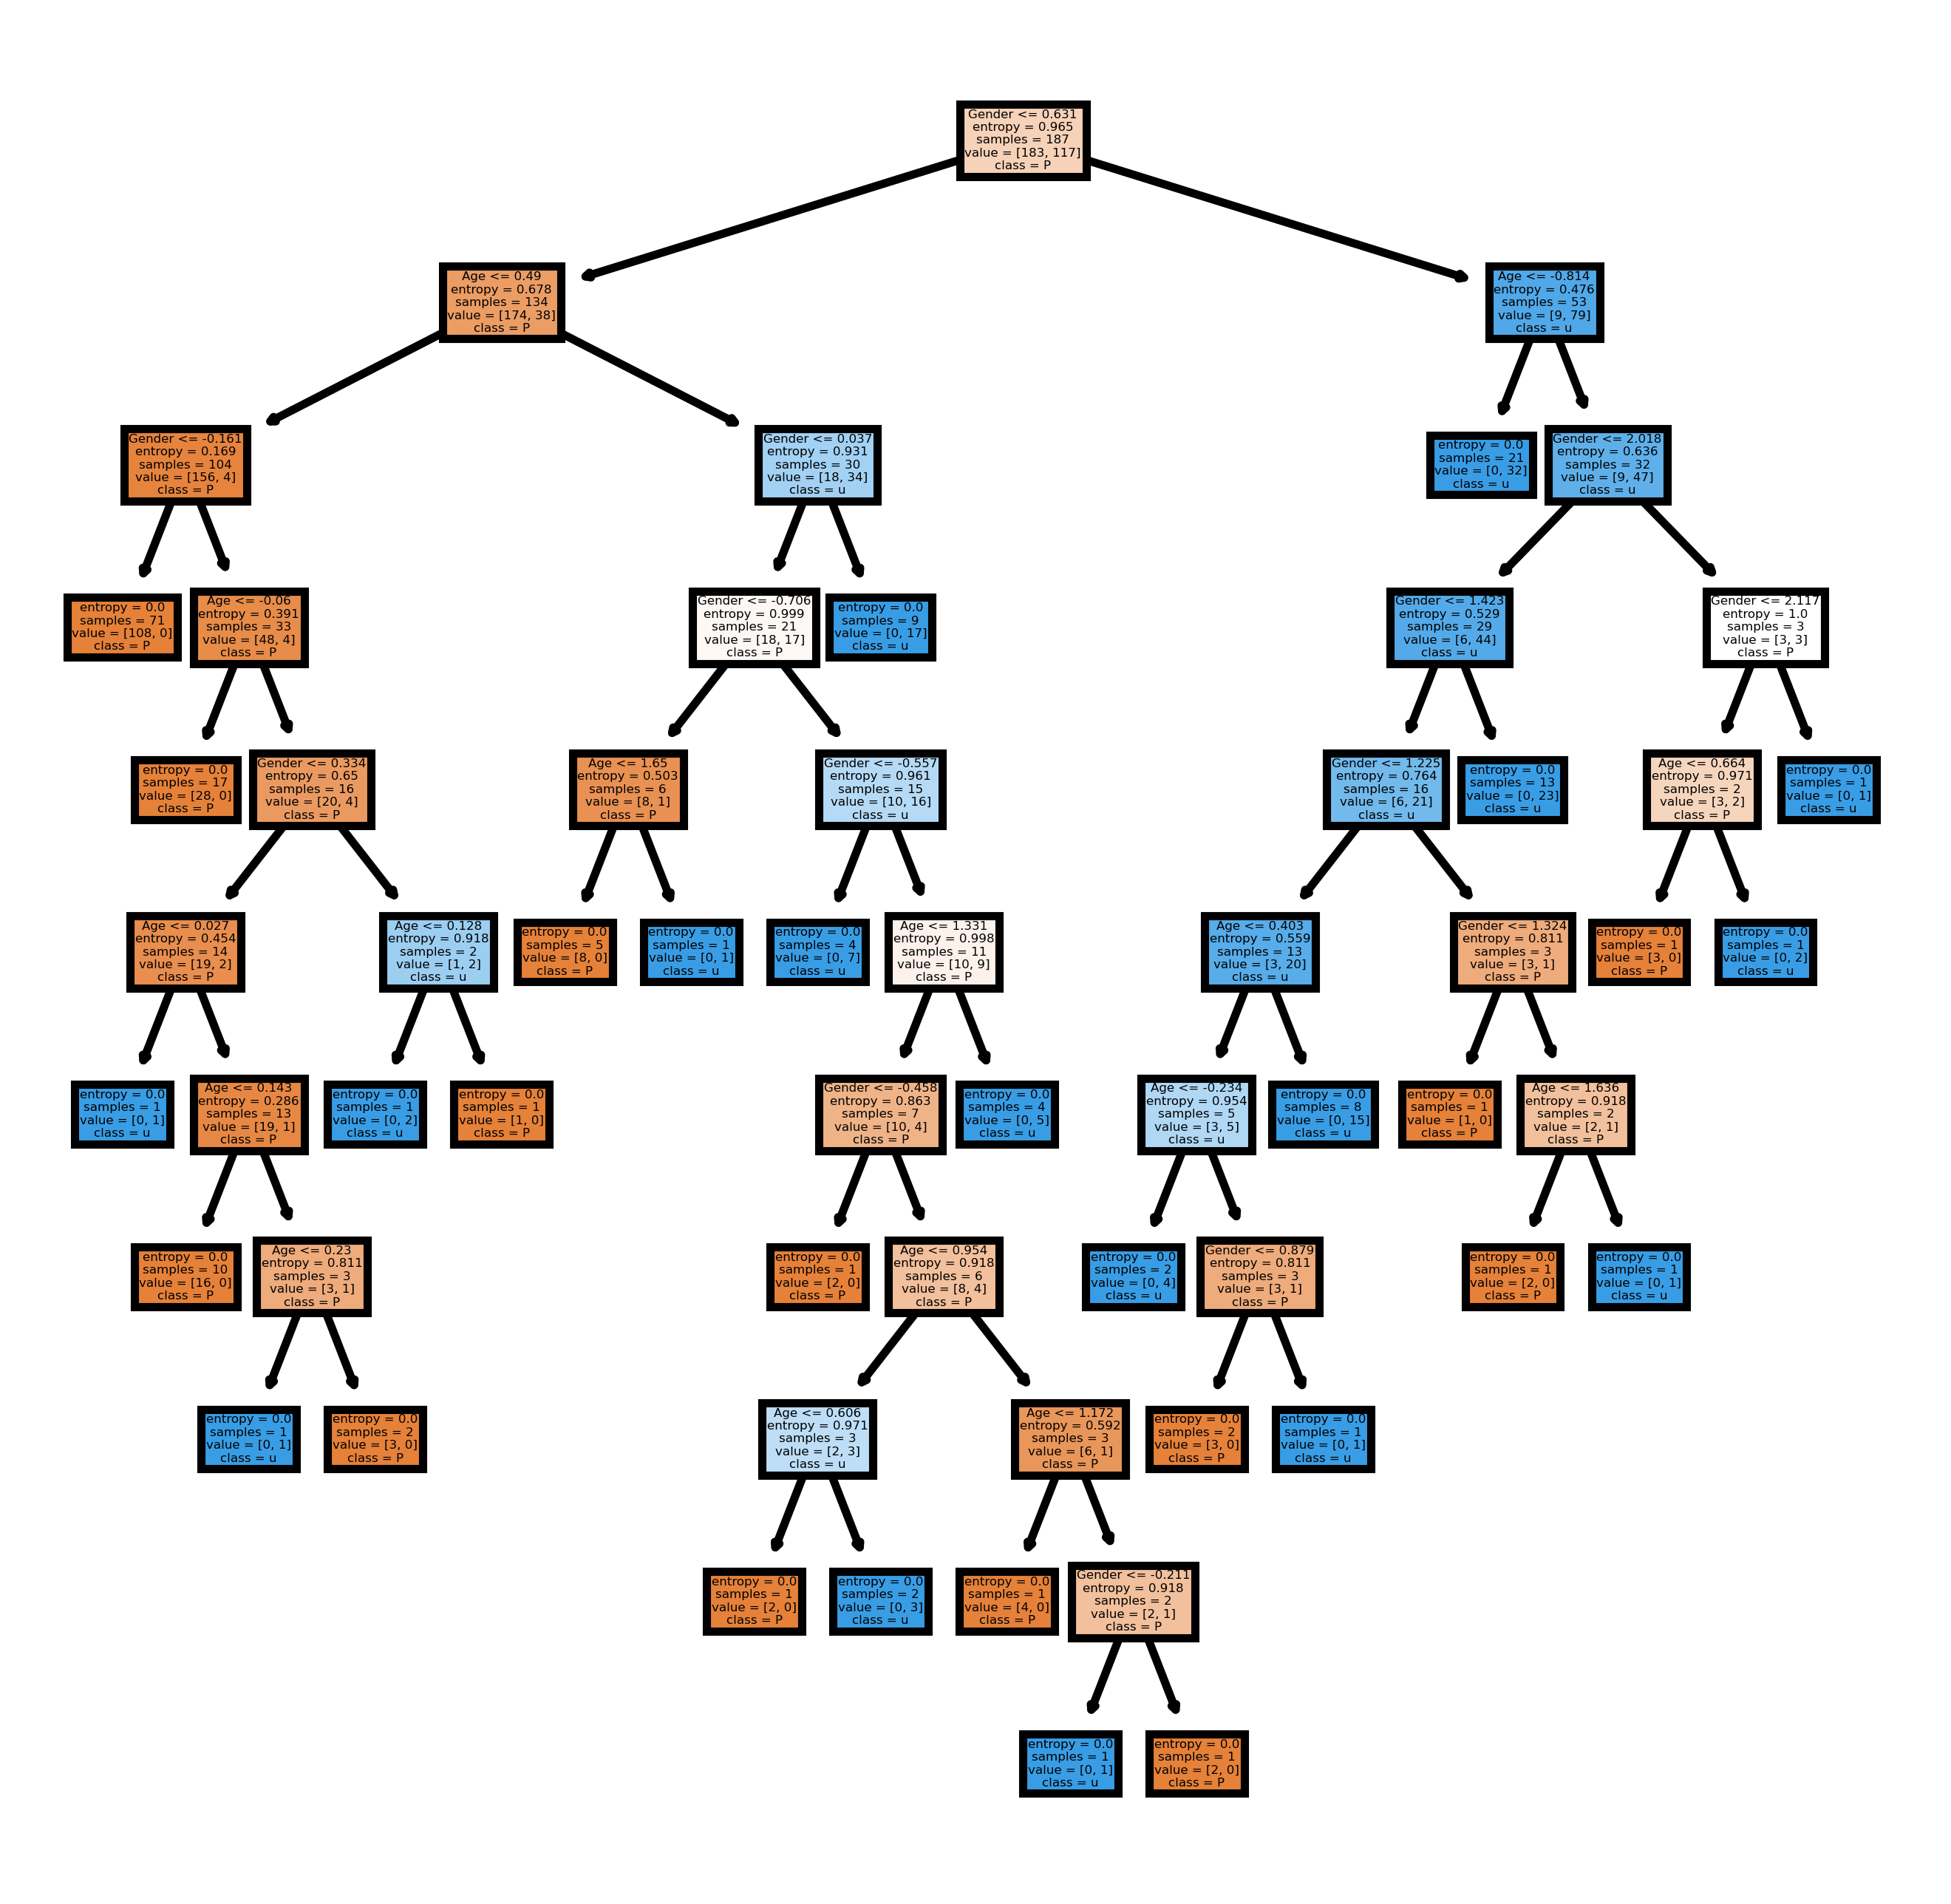

In [11]:
from sklearn import tree
fn=datasets.columns[1:4]
cn=datasets.columns[4]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')